# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
arc_df = pd.read_csv('twitter-archive-enhanced.csv')
arc_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)

content = req.content

with open('image-predictions.tsv', 'wb') as image:
    image = image.write(content)

In [4]:
image_df = pd.read_csv('image-predictions.tsv', delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

#Creating third df and extraxting the intended columns: -
fav_df = pd.read_json('tweet-json.txt', lines=True)
fav_df = fav_df.loc[:, fav_df.columns.intersection(['id', 'favorite_count', 'retweet_count'])]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
fav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [9]:
arc_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [10]:
arc_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
arc_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
arc_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
arc_df.query('doggo == "doggo" | floofer == "floofer" | pupper == "pupper" | puppo == "puppo"').shape

(380, 17)

In [14]:
arc_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
arc_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Quality issues


- **First dataset**: -

  1. arc_df: Wrong dtypes (**tweet_id**, **timestamp**) >> to **object**, **datetime**.

  2. arc_df: Replies >> remove all reply rows.

  3. arc_df: Retweets >>  remove all retweet rows.

  4. arc_df: Rating denominator is not 10 >> Remove row.

  5. arc_df: Rating numerator less than 10 >> Remove row.

  6. arc_df: None values >> replace it with **NaN** (null) to clarify # of missing values.
  
  7. arc_df: Empty columns >> After finishing (2 & 3), remove the columns to minimize non-needed columns.
  
  8. arc_df: Inconsistent **rating_numerator** values (1776, 420, etc..) (outliers) >> Will be removed after **.join**




- **Second dataset**: -

  9. image_df: ALL-False predictions >> Remove row.

  10. image_df: Wrong dtype (**tweet_id**) >> to **object**.



- **Third dataset**: -

  11. fav_df: Wrong dtype (**id**) >> to **object**.


### Tidiness issues 

   1. arc_df: Dog stages are columns instead of observations >> Create a **dog_stage** column, and include the observations as values inside it.

   2. image_df: There are multiple observitional units instead of one table >> Remove all of them to keep the highest **True**    (p1>p2>p3).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data: -
arc_clean = arc_df.copy()
image_clean = image_df.copy()
fav_clean = fav_df.copy()

### Issue #1: Quality issues

#### Define: -
##### -Fix the data type of all DFs columns, then remove the excluded rows in arc_df and image_clean.

#### Code

In [17]:
#Correcting all faulty dtypes: -

arc_clean['tweet_id'] = arc_clean['tweet_id'].astype(str)
arc_clean['timestamp'] = pd.to_datetime(arc_clean['timestamp'])

image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#rename id to tweet_id to unite the column name: -
fav_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

fav_clean['tweet_id'] = fav_clean['tweet_id'].astype(str)


In [18]:
#Remove retweet & reply rows: -
arc_clean = arc_clean[(arc_clean['in_reply_to_status_id'].isnull() == True) & (arc_clean['retweeted_status_id'].isnull() == True)]

In [19]:
#Remove faulty ratings rows: -
arc_clean = arc_clean.query('rating_numerator > 9 & rating_denominator == 10')

In [20]:
#Replace the string 'None' with NaN (null): -
arc_clean.replace('None', np.nan, inplace=True)

In [21]:
#Remove NaN columns: -
arc_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [22]:
#Remove ALL-False rows: -

image_clean = image_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

#### Test

In [23]:
#Checking the DFs after the fixes: -

arc_clean.info(), image_clean.info(), fav_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 2350
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1665 non-null   object             
 1   timestamp           1665 non-null   datetime64[ns, UTC]
 2   source              1665 non-null   object             
 3   text                1665 non-null   object             
 4   expanded_urls       1662 non-null   object             
 5   rating_numerator    1665 non-null   int64              
 6   rating_denominator  1665 non-null   int64              
 7   name                1199 non-null   object             
 8   doggo               79 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              190 non-null    object             
 11  puppo               23 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

(None, None, None)

### Issue #2: Tidiness Issues

#### Define: -

##### - Make a new column to include the dog stage as values. 
##### - pick the highest True prediction available to drop the rest.
##### -Change column name to [breed, conf] to gather all values into one chunk.

#### Code

In [24]:
#Fixing tidiness issue: Using (for loop) to create one column that states dog_stage and remove the stage columns: -
breeds = ['doggo', 'floofer', 'pupper', 'puppo']

for breed in breeds:
    stage = (arc_clean['doggo'] == breed) | (arc_clean['floofer'] == breed) | (arc_clean['pupper'] == breed) | (arc_clean['puppo'] == breed)
    arc_clean.loc[stage, 'dog_stage'] = breed
    
arc_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [25]:
#Fixing tidiness issue: Priority to p1 True predictions (since they have the highest conf): -
p1 = image_clean.query('p1_dog == True')
p1 = p1.loc[:, p1.columns.intersection(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf'])]
p1.rename(columns={'p1_conf' : 'conf', 'p1': 'breed'}, inplace=True)


#Then p2 (second highest True predictions): -
p2 = image_clean.query('p1_dog == False & p2_dog == True')
p2 = p2.loc[:, p2.columns.intersection(['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf'])]
p2.rename(columns={'p2_conf' : 'conf', 'p2': 'breed'}, inplace=True)


#Finally p3: -
p3 = image_clean.query('p1_dog == False & p2_dog == False & p3_dog == True')
p3 = p3.loc[:, p3.columns.intersection(['tweet_id', 'jpg_url', 'img_num', 'p3', 'p3_conf'])]
p3.rename(columns={'p3_conf' : 'conf', 'p3': 'breed'}, inplace=True)

In [26]:
#Concating the three datasets into a new df called image_clean2: -
image_clean2 = pd.concat([p1, p2, p3])


#### Test

In [27]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 2350
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1665 non-null   object             
 1   timestamp           1665 non-null   datetime64[ns, UTC]
 2   source              1665 non-null   object             
 3   text                1665 non-null   object             
 4   expanded_urls       1662 non-null   object             
 5   rating_numerator    1665 non-null   int64              
 6   rating_denominator  1665 non-null   int64              
 7   name                1199 non-null   object             
 8   dog_stage           292 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 130.1+ KB


In [30]:
image_clean2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                   breed      conf  
0        1  Welsh_springer_spaniel  0.465074  
1        1                 redbone  0.506826  
2        1         German_shepherd  0.596461  
3        1     Rhodesian_ridgeback  0.408143  
4        1      miniature_pinscher  0.560311

## Joining Data

In [31]:
#Joining All three datasets into new one called master_df: -
master_df = arc_clean.set_index('tweet_id').join([image_clean2.set_index('tweet_id'), fav_clean.set_index('tweet_id')], how='inner')

In [32]:
#Reset index 
master_df.reset_index(inplace=True)

In [33]:
#Quick check for outliers before storing data: -

master_df['rating_numerator'].value_counts()

12    421
10    358
11    352
13    221
14     21
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [34]:
#Storing Data: -

master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [35]:
#Sum of favorites for each breed (2015-2017): -
master_df.groupby('breed').sum().sort_values(by='favorite_count', ascending=False)

rating_numerator  rating_denominator  img_num       conf  \
breed                                                                          
golden_retriever                1693                1440      184  94.615619   
Labrador_retriever              1078                 940      114  55.944800   
Pembroke                        1036                 880      112  61.292324   
Chihuahua                        777                 680       89  35.874699   
Samoyed                          484                 410       48  29.702060   
...                              ...                 ...      ...        ...   
Brabancon_griffon                 30                  30        4   1.109944   
Tibetan_terrier                   12                  10        1   0.328161   
groenendael                       20                  20        2   0.605251   
standard_schnauzer                12                  10        2   0.441427   
Irish_wolfhound                   11                  10        2   0.063078   

                    retweet_count  favorite_count  
breed                                              
golden_retriever           555748         1842520  
Labrador_retriever         383567         1209811  
Pembroke                   286177         1019431  
Chihuahua                  221128          682371  
Samoyed                    201627          578270  
...                           ...             ...  
Brabancon_griffon             863            2655  
Tibetan_terrier               776            2411  
groenendael                   553            2313  
standard_schnauzer            928            2046  
Irish_wolfhound               819            1534  

[111 rows x 6 columns]

In [36]:
#Number of tweets for each breed (2015-2017): -
master_df.groupby('breed', as_index=False).count().sort_values(by='tweet_id', ascending=False)

breed  tweet_id  timestamp  source  text  expanded_urls  \
87        golden_retriever       144        144     144   144            144   
36      Labrador_retriever        94         94      94    94             94   
48                Pembroke        88         88      88    88             88   
16               Chihuahua        68         68      68    68             68   
99                     pug        46         46      46    46             46   
..                     ...       ...        ...     ...   ...            ...   
21             EntleBucher         1          1       1     1              1   
11    Bouvier_des_Flandres         1          1       1     1              1   
83  curly-coated_retriever         1          1       1     1              1   
3              Appenzeller         1          1       1     1              1   
34         Irish_wolfhound         1          1       1     1              1   

    rating_numerator  rating_denominator  name  dog_stage  jpg_url  img_num  \
87               144                 144   104         33      144      144   
36                94                  94    67         17       94       94   
48                88                  88    70         13       88       88   
16                68                  68    52          9       68       68   
99                46                  46    35          9       46       46   
..               ...                 ...   ...        ...      ...      ...   
21                 1                   1     0          0        1        1   
11                 1                   1     0          0        1        1   
83                 1                   1     1          1        1        1   
3                  1                   1     1          0        1        1   
34                 1                   1     1          0        1        1   

    conf  retweet_count  favorite_count  
87   144            144             144  
36    94             94              94  
48    88             88              88  
16    68             68              68  
99    46             46              46  
..   ...            ...             ...  
21     1              1               1  
11     1              1               1  
83     1              1               1  
3      1              1               1  
34     1              1               1  

[111 rows x 15 columns]

In [37]:
#Number of tweets for each breed per year: -
master_df.groupby([master_df['timestamp'].dt.year, 'breed']).count().sort_values(by='favorite_count', ascending=False)

tweet_id  timestamp  source  text  \
timestamp breed                                                          
2016      golden_retriever                 84         84      84    84   
          Pembroke                         49         49      49    49   
          Labrador_retriever               47         47      47    47   
2017      golden_retriever                 33         33      33    33   
2016      chow                             29         29      29    29   
...                                       ...        ...     ...   ...   
2017      English_setter                    1          1       1     1   
2016      Irish_water_spaniel               1          1       1     1   
2017      Dandie_Dinmont                    1          1       1     1   
2015      Staffordshire_bullterrier         1          1       1     1   
2017      Bouvier_des_Flandres              1          1       1     1   

                                     expanded_urls  rating_numerator  \
timestamp breed                                                        
2016      golden_retriever                      84                84   
          Pembroke                              49                49   
          Labrador_retriever                    47                47   
2017      golden_retriever                      33                33   
2016      chow                                  29                29   
...                                            ...               ...   
2017      English_setter                         1                 1   
2016      Irish_water_spaniel                    1                 1   
2017      Dandie_Dinmont                         1                 1   
2015      Staffordshire_bullterrier              1                 1   
2017      Bouvier_des_Flandres                   1                 1   

                                     rating_denominator  name  dog_stage  \
timestamp breed                                                            
2016      golden_retriever                           84    62         20   
          Pembroke                                   49    40          7   
          Labrador_retriever                         47    32          9   
2017      golden_retriever                           33    28          8   
2016      chow                                       29    26          2   
...                                                 ...   ...        ...   
2017      English_setter                              1     1          0   
2016      Irish_water_spaniel                         1     1          0   
2017      Dandie_Dinmont                              1     1          1   
2015      Staffordshire_bullterrier                   1     0          0   
2017      Bouvier_des_Flandres                        1     0          0   

                                     jpg_url  img_num  conf  retweet_count  \
timestamp breed                                                              
2016      golden_retriever                84       84    84             84   
          Pembroke                        49       49    49             49   
          Labrador_retriever              47       47    47             47   
2017      golden_retriever                33       33    33             33   
2016      chow                            29       29    29             29   
...                                      ...      ...   ...            ...   
2017      English_setter                   1        1     1              1   
2016      Irish_water_spaniel              1        1     1              1   
2017      Dandie_Dinmont                   1        1     1              1   
2015      Staffordshire_bullterrier        1        1     1              1   
2017      Bouvier_des_Flandres             1        1     1              1   

                                     favorite_count  
timestamp breed                                      
2016      golden_retrieve

In [38]:
#Sum of favorites and retweets per year: -
master_df.groupby([master_df['timestamp'].dt.year, 'breed']).sum().sort_values(by='favorite_count', ascending=False)

rating_numerator  rating_denominator  \
timestamp breed                                                         
2016      golden_retriever                    976                 840   
2017      golden_retriever                    416                 330   
          Labrador_retriever                  322                 260   
          Pembroke                            297                 230   
2016      Labrador_retriever                  520                 470   
...                                           ...                 ...   
2015      groenendael                          10                  10   
          flat-coated_retriever                12                  10   
          Walker_hound                         10                  10   
          toy_terrier                          10                  10   
          English_setter                       11                  10   

                                 img_num       conf  retweet_count  \
timestamp breed                                                      
2016      golden_retriever           114  55.360044         326750   
2017      golden_retriever            43  22.236984         185936   
          Labrador_retriever          35  15.955817         140422   
          Pembroke                    27  17.592649         148495   
2016      Labrador_retriever          57  27.702837         233110   
...                                  ...        ...            ...   
2015      groenendael                  1   0.054455            140   
          flat-coated_retriever        1   0.508392            101   
          Walker_hound                 1   0.260857            174   
          toy_terrier                  1   0.149680             48   
          English_setter               1   0.298617             16   

                                 favorite_count  
timestamp breed                                  
2016      golden_retriever               941043  
2017      golden_retriever               807046  
          Labrador_retriever             623317  
          Pembroke                       597892  
2016      Labrador_retriever             556440  
...                                         ...  
2015      groenendael                       417  
          flat-coated_retriever             346  
          Walker_hound                      335  
          toy_terrier                       129  
          English_setter                     81  

[264 rows x 6 columns]

In [39]:
#Sum of favorites each year for top 3 breeds only: --
master_df.groupby([master_df['timestamp'].dt.year, 'breed']).sum().sort_values(by='favorite_count', ascending=False).query('breed == "golden_retriever" | breed == "Pembroke" | breed == "Labrador_retriever"')

rating_numerator  rating_denominator  img_num  \
timestamp breed                                                               
2016      golden_retriever                 976                 840      114   
2017      golden_retriever                 416                 330       43   
          Labrador_retriever               322                 260       35   
          Pembroke                         297                 230       27   
2016      Labrador_retriever               520                 470       57   
          Pembroke                         562                 490       65   
2015      golden_retriever                 301                 270       27   
          Pembroke                         177                 160       20   
          Labrador_retriever               236                 210       22   

                                   conf  retweet_count  favorite_count  
timestamp breed                                                         
2016      golden_retriever    55.360044         326750          941043  
2017      golden_retriever    22.236984         185936          807046  
          Labrador_retriever  15.955817         140422          623317  
          Pembroke            17.592649         148495          597892  
2016      Labrador_retriever  27.702837         233110          556440  
          Pembroke            33.525318         120310          371976  
2015      golden_retriever    17.018590          43062           94431  
          Pembroke            10.174356          17372           49563  
          Labrador_retriever  12.286146          10035           30054

In [40]:
# Numebr of tweets each year for top 3 breeds only: -
master_df.groupby([master_df['timestamp'].dt.year, 'breed']).count().query('breed == "golden_retriever" | breed == "Pembroke" | breed == "Labrador_retriever"').sort_values(by='favorite_count', ascending=False)

tweet_id  timestamp  source  text  \
timestamp breed                                                   
2016      golden_retriever          84         84      84    84   
          Pembroke                  49         49      49    49   
          Labrador_retriever        47         47      47    47   
2017      golden_retriever          33         33      33    33   
2015      golden_retriever          27         27      27    27   
2017      Labrador_retriever        26         26      26    26   
          Pembroke                  23         23      23    23   
2015      Labrador_retriever        21         21      21    21   
          Pembroke                  16         16      16    16   

                              expanded_urls  rating_numerator  \
timestamp breed                                                 
2016      golden_retriever               84                84   
          Pembroke                       49                49   
          Labrador_retriever             47                47   
2017      golden_retriever               33                33   
2015      golden_retriever               27                27   
2017      Labrador_retriever             26                26   
          Pembroke                       23                23   
2015      Labrador_retriever             21                21   
          Pembroke                       16                16   

                              rating_denominator  name  dog_stage  jpg_url  \
timestamp breed                                                              
2016      golden_retriever                    84    62         20       84   
          Pembroke                            49    40          7       49   
          Labrador_retriever                  47    32          9       47   
2017      golden_retriever                    33    28          8       33   
2015      golden_retriever                    27    14          5       27   
2017      Labrador_retriever                  26    20          5       26   
          Pembroke                            23    18          4       23   
2015      Labrador_retriever                  21    15          3       21   
          Pembroke                            16    12          2       16   

                              img_num  conf  retweet_count  favorite_count  
timestamp breed                                                             
2016      golden_retriever         84    84             84              84  
          Pembroke                 49    49             49              49  
          Labrador_retriever       47    47             47              47  
2017      golden_retriever         33    33             33              33  
2015      golden_retriever         27    27             27              27  
2017      Labrador_retriever       26    26             26              26  
          Pembroke                 23    23             23              23  
2015      Labrador_retriever       21    21             21              21  
          Pembroke                 16    16             16              16

### Insights:
1. **Golden retriever** has a much greater number of tweets, favorites and retweets among all other breeds, which makes it the most popular breed with no competitions.


2. **Irish Wolfhound** has the lowest favorite and retweet count among all other breeds. This would suggest that it is the most unpopular breed.


3. In 2015, **WeRateDogs** had posted 28 tweets of **golden retriever** with a total favorites of 96214. Surprisingly, in 2016, the number of favorites to **golden retriever** tweets have dramatically increased to be roughly a **million** favorites even though the number of tweets during the year had increased only by 8. 

### Visualization

In [41]:
#Saving top 3 dogs into new df called top_dogs: -
top_dogs = master_df.groupby([master_df['timestamp'].dt.year, 'breed'], as_index=True).sum().sort_values(by='favorite_count', ascending=False).query('breed == "golden_retriever" | breed == "Pembroke" | breed == "Labrador_retriever"')

In [42]:
top_dogs = top_dogs.sort_values(by='timestamp', ascending=False)

In [43]:
top_dogs.reset_index(inplace=True)

In [44]:
# Due to a keyError, I had to change dtype of timestamp to str during visualization: -
top_dogs['timestamp'] = top_dogs['timestamp'].astype(str)
top_dogs = top_dogs.sort_values(by='timestamp', ascending=True)

In [45]:
top_dogs.groupby(['breed', 'timestamp']).sum()

rating_numerator  rating_denominator  img_num  \
breed              timestamp                                                  
Labrador_retriever 2015                    236                 210       22   
                   2016                    520                 470       57   
                   2017                    322                 260       35   
Pembroke           2015                    177                 160       20   
                   2016                    562                 490       65   
                   2017                    297                 230       27   
golden_retriever   2015                    301                 270       27   
                   2016                    976                 840      114   
                   2017                    416                 330       43   

                                   conf  retweet_count  favorite_count  
breed              timestamp                                            
Labrador_retriever 2015       12.286146          10035           30054  
                   2016       27.702837         233110          556440  
                   2017       15.955817         140422          623317  
Pembroke           2015       10.174356          17372           49563  
                   2016       33.525318         120310          371976  
                   2017       17.592649         148495          597892  
golden_retriever   2015       17.018590          43062           94431  
                   2016       55.360044         326750          941043  
                   2017       22.236984         185936          807046

In [46]:
#Golden retriever visualization df: -
golden = top_dogs.query('breed == "golden_retriever"')
golden

timestamp             breed  rating_numerator  rating_denominator  img_num  \
6      2015  golden_retriever               301                 270       27   
3      2016  golden_retriever               976                 840      114   
0      2017  golden_retriever               416                 330       43   

        conf  retweet_count  favorite_count  
6  17.018590          43062           94431  
3  55.360044         326750          941043  
0  22.236984         185936          807046

In [47]:
#Pembroke visualization df
pembroke = top_dogs.query('breed == "Pembroke"')
pembroke

timestamp     breed  rating_numerator  rating_denominator  img_num  \
7      2015  Pembroke               177                 160       20   
5      2016  Pembroke               562                 490       65   
2      2017  Pembroke               297                 230       27   

        conf  retweet_count  favorite_count  
7  10.174356          17372           49563  
5  33.525318         120310          371976  
2  17.592649         148495          597892

In [48]:
#Labrador retriever visualization df: -
labrador = top_dogs.query('breed == "Labrador_retriever"')
labrador

timestamp               breed  rating_numerator  rating_denominator  \
8      2015  Labrador_retriever               236                 210   
4      2016  Labrador_retriever               520                 470   
1      2017  Labrador_retriever               322                 260   

   img_num       conf  retweet_count  favorite_count  
8       22  12.286146          10035           30054  
4       57  27.702837         233110          556440  
1       35  15.955817         140422          623317

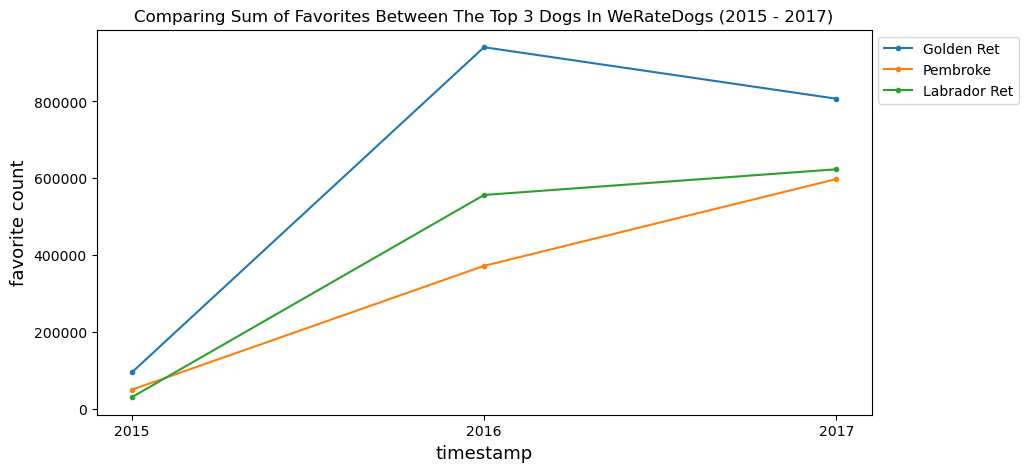

In [50]:
#Using matplotlib to create a line chart of the analysis: -
plt.figure(figsize=(10, 5))
plt.title('Comparing Sum of Favorites Between The Top 3 Dogs In WeRateDogs (2015 - 2017)')
plt.ylabel('favorite count', fontsize=13)
plt.xlabel('timestamp', fontsize=13)

plt.plot(golden['timestamp'], golden['favorite_count'], marker='.')
plt.plot(pembroke['timestamp'], pembroke['favorite_count'], marker='.')
plt.plot(labrador['timestamp'], labrador['favorite_count'], marker='.')

plt.legend(['Golden Ret', 'Pembroke', 'Labrador Ret'], bbox_to_anchor=(1, 1));
